In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC


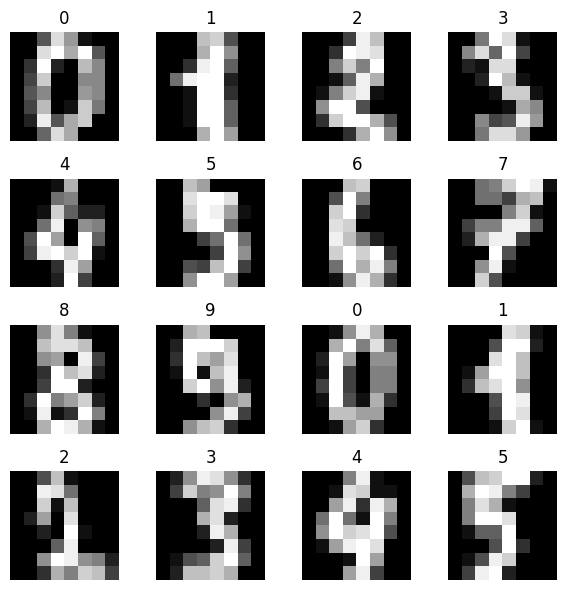

In [ ]:
# Tải bộ dữ liệu MNIST
digits = datasets.load_digits()

# Hiển thị một số ảnh từ bộ dữ liệu
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
for ax, img, label in zip(axes.flatten(), digits.images, digits.target):
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

# Huấn luyện mô hình SVM
clf = svm.SVC()
clf.fit(X_train, y_train)

# Đánh giá độ chính xác của mô hình trên tập kiểm tra
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9911111111111112


In [ ]:
# Tìm kiếm các giá trị tối ưu cho các tham số C và gamma
param_grid = {'C': [1, 3, 5, 7,10, 30, 50, 70, 100], 'gamma': [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7 ,10]}
grid = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# In ra các giá trị tối ưu cho các tham số C và gamma
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1, 'gamma': 0.1}


In [ ]:
# Huấn luyện mô hình SVM với các giá trị tối ưu
clf = svm.SVC(C=1, gamma=0.1)
clf.fit(X_test, y_test)

# Đánh giá độ chính xác của mô hình trên tập kiểm tra
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


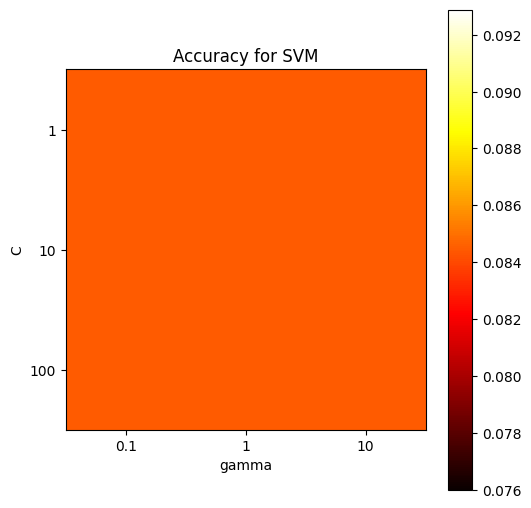

In [ ]:
# Tạo một mảng để lưu độ chính xác của các mô hình SVM với các giá trị khác nhau của C và gamma
acc_list = np.zeros((3, 3))

# Lặp qua các giá trị của C và gamma để huấn luyện mô hình và tính toán độ chính xác
for i, C in enumerate([1, 10, 100]):
    for j, gamma in enumerate([0.1, 1, 10]):
        clf = svm.SVC(C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        acc_list[i, j] = acc

# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(acc_list, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(3), [0.1, 1, 10])
plt.yticks(np.arange(3), [1, 10, 100])
plt.title('Accuracy for SVM')
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)


scores = cross_val_score(svm, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")



Cross-validation scores: [0.98958333 0.98263889 0.97560976 0.99303136 0.98954704]
Mean cross-validation score: 0.9860820751064654
